# 군집분석
* 각 개체의 유사성을 측정하여 유사성이 높은 대상 집단을 분류 (비지도 학습)
* 계층적 군집분석은 데이터들을 계층적인 트리 구조로 그룹화
* 비계층적 군집분석은 데이터를 미리 정해진 클러스터 수에 맞춰 직접 할당하는 방법


# 1) 계층적 군집분석
군집 수를 사전에 지정할 필요가 없음


* 최단 연결법 : 최단연결법은 두 군집 간의 가장 가까운 데이터 사이의 거리를 기준으로 군집을 합병
* 최장 연결법 : 두 군집 간의 가장 먼 데이터 사이의 거리를 기준으로 군집을 합병
* 평균 연결법 :  두 군집 간의 모든 데이터 쌍 사이의 거리를 계산하고 이 거리들의 평균을 통해 군집 합병
* 와드 연결법 :  군집의 제곱합을 최소화하는 방식으로 군집 합병

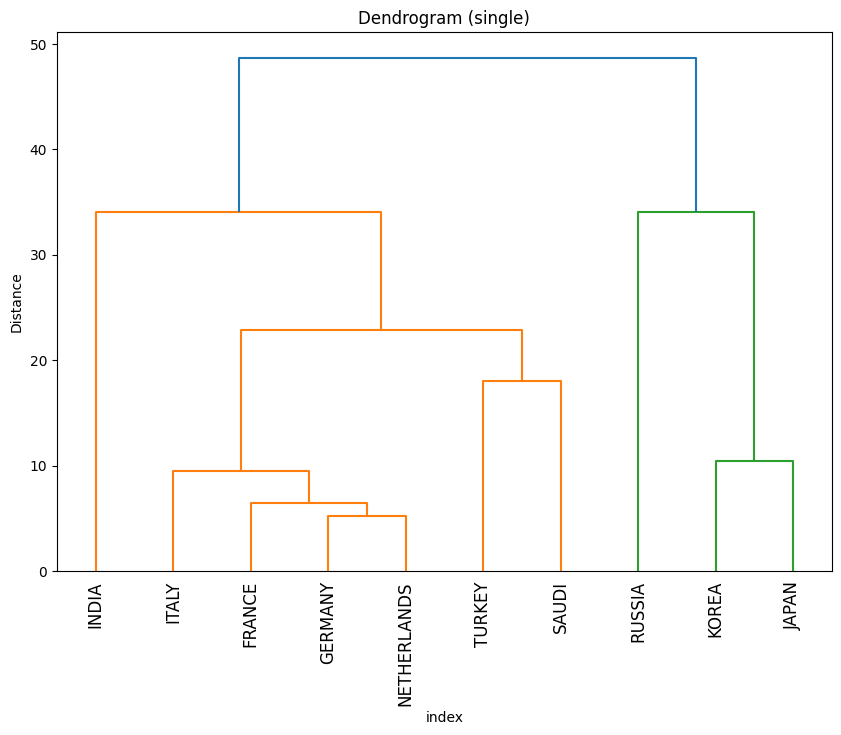

In [6]:
import pandas as pd
df = pd.read_csv('./country.csv')
df.head()

from scipy.cluster.hierarchy import dendrogram, linkage

single = linkage(df[['latitude','longitude']], method = 'single')

#덴드로그램 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
dendrogram(single, labels= df['country'].tolist(), leaf_rotation = 90)
plt.title('Dendrogram (single)')
plt.xlabel("index")
plt.ylabel('Distance')
plt.show()

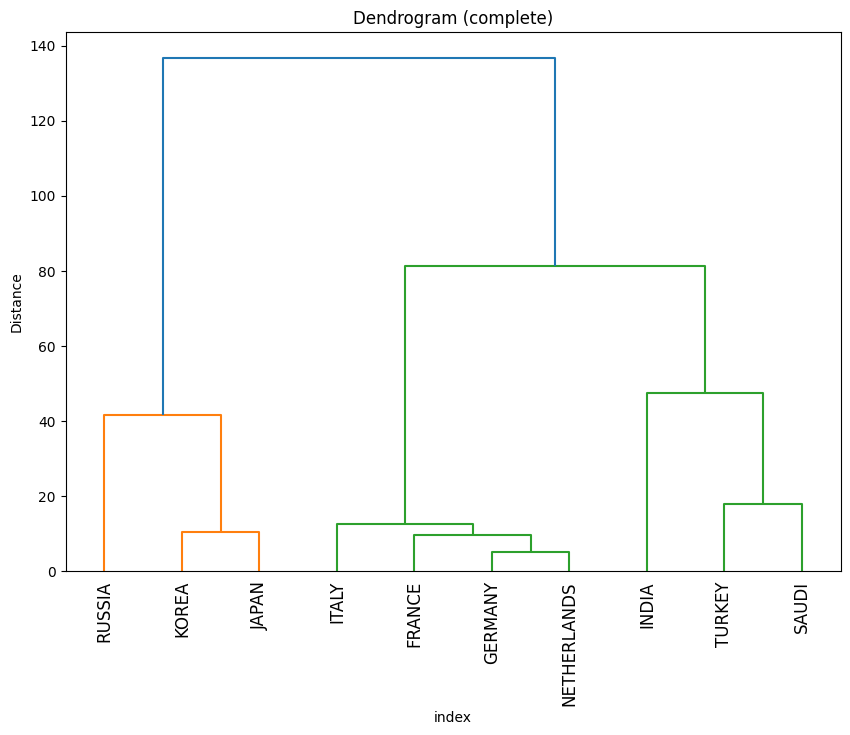

In [7]:
import pandas as pd
df = pd.read_csv('./country.csv')
df.head()

from scipy.cluster.hierarchy import dendrogram, linkage

single = linkage(df[['latitude','longitude']], method = 'complete')

#덴드로그램 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
dendrogram(single, labels= df['country'].tolist(), leaf_rotation = 90)
plt.title('Dendrogram (complete)')
plt.xlabel("index")
plt.ylabel('Distance')
plt.show()

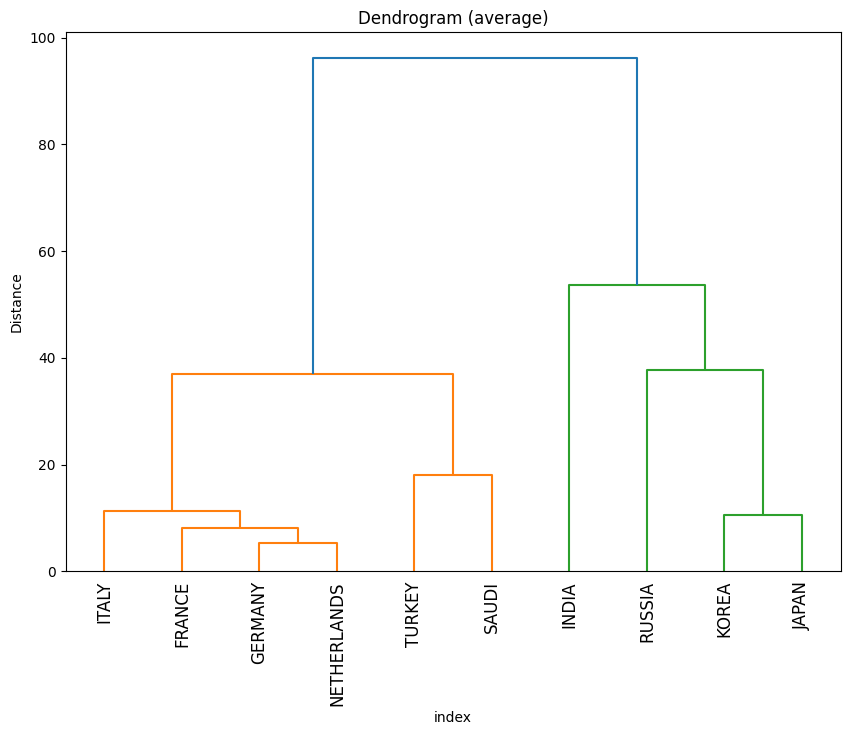

In [8]:
import pandas as pd
df = pd.read_csv('./country.csv')
df.head()

from scipy.cluster.hierarchy import dendrogram, linkage

single = linkage(df[['latitude','longitude']], method = 'average')

#덴드로그램 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
dendrogram(single, labels= df['country'].tolist(), leaf_rotation = 90)
plt.title('Dendrogram (average)')
plt.xlabel("index")
plt.ylabel('Distance')
plt.show()

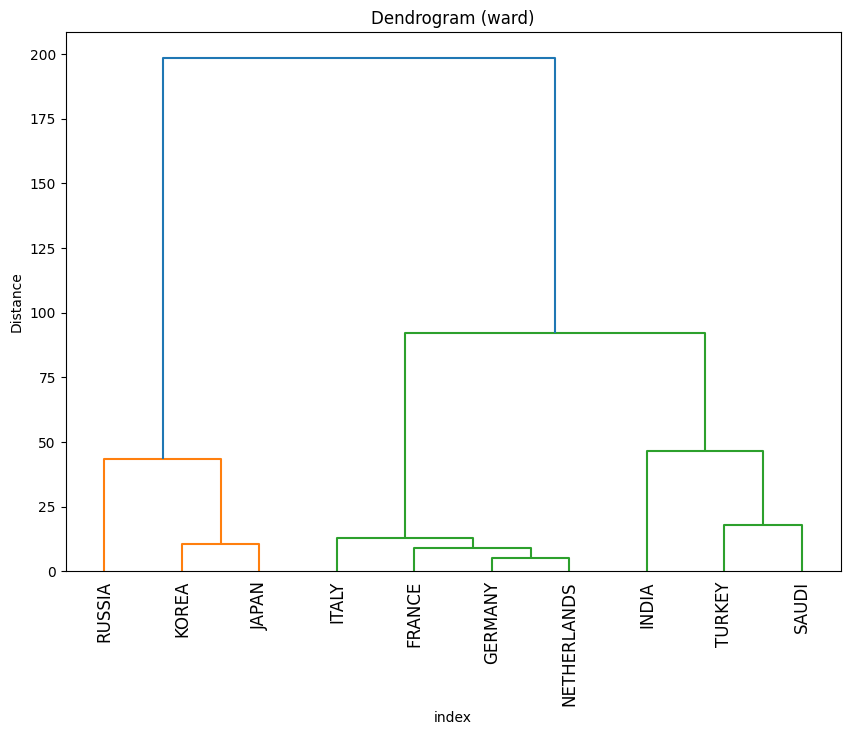

In [10]:
import pandas as pd
df = pd.read_csv('./country.csv')
df.head()

from scipy.cluster.hierarchy import dendrogram, linkage

single = linkage(df[['latitude','longitude']], method = 'ward')

#덴드로그램 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
dendrogram(single, labels= df['country'].tolist(), leaf_rotation = 90)
plt.title('Dendrogram (ward)')
plt.xlabel("index")
plt.ylabel('Distance')
plt.show()

       country  latitude  longitude  Cluster
0        KOREA  35.90780   127.7669        1
1        JAPAN  36.20480   138.2529        1
2      GERMANY  51.16570    10.4515        3
3       FRANCE  46.60340     1.8883        3
4       RUSSIA  61.52400   105.3188        2
5        INDIA  20.59370    78.9629        5
6        ITALY  41.87190    12.5674        3
7       TURKEY  38.96370    35.2433        4
8  NETHERLANDS  52.12326     5.2913        3
9        SAUDI  23.88590    45.0792        4


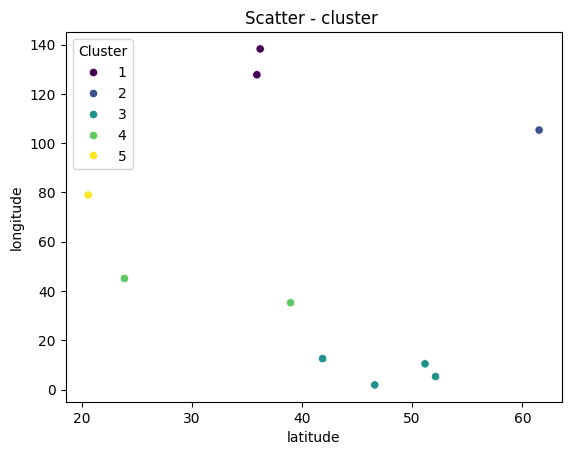

In [14]:
from scipy.cluster.hierarchy import fcluster
max = 20
clusters = fcluster(single, max, criterion = 'distance')

df['Cluster'] = clusters

print(df)

import seaborn as sns
sns.scatterplot(data = df, x = 'latitude', y='longitude', hue = 'Cluster', palette = 'viridis')
plt.title("Scatter - cluster ")
plt.show()

# 2) 비계층적 군집분석

초기 군집 설정 후 데이터를 반복적으로 재배치하여 군집 형성

* kmeans 군집분석 :
  * k개의 군집 중심을 무작위로 선택 후, 각 데이터를 가장 가까운 군집 중심에 할당
  * 각 군집의 중심을 재계산하여 중심의 변화가 없으면 멈춤





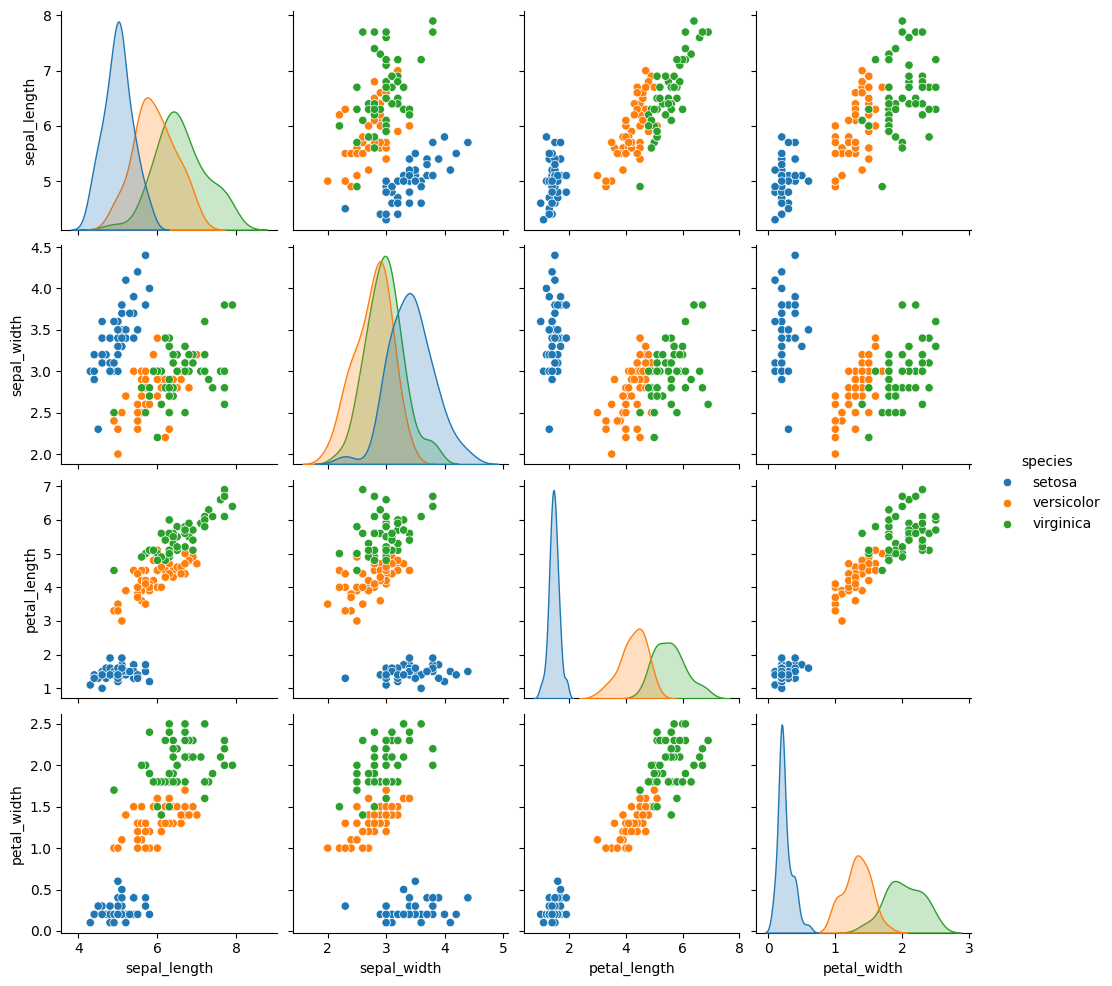

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')

sns.pairplot(iris, hue = 'species')

In [16]:
X = iris.drop('species',axis = 1)
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state = 10)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=10)

In [17]:
iris_km = X.copy()
iris_km['km_result'] = km.labels_
iris_km

,sepal_length,sepal_width,petal_length,petal_width,km_result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


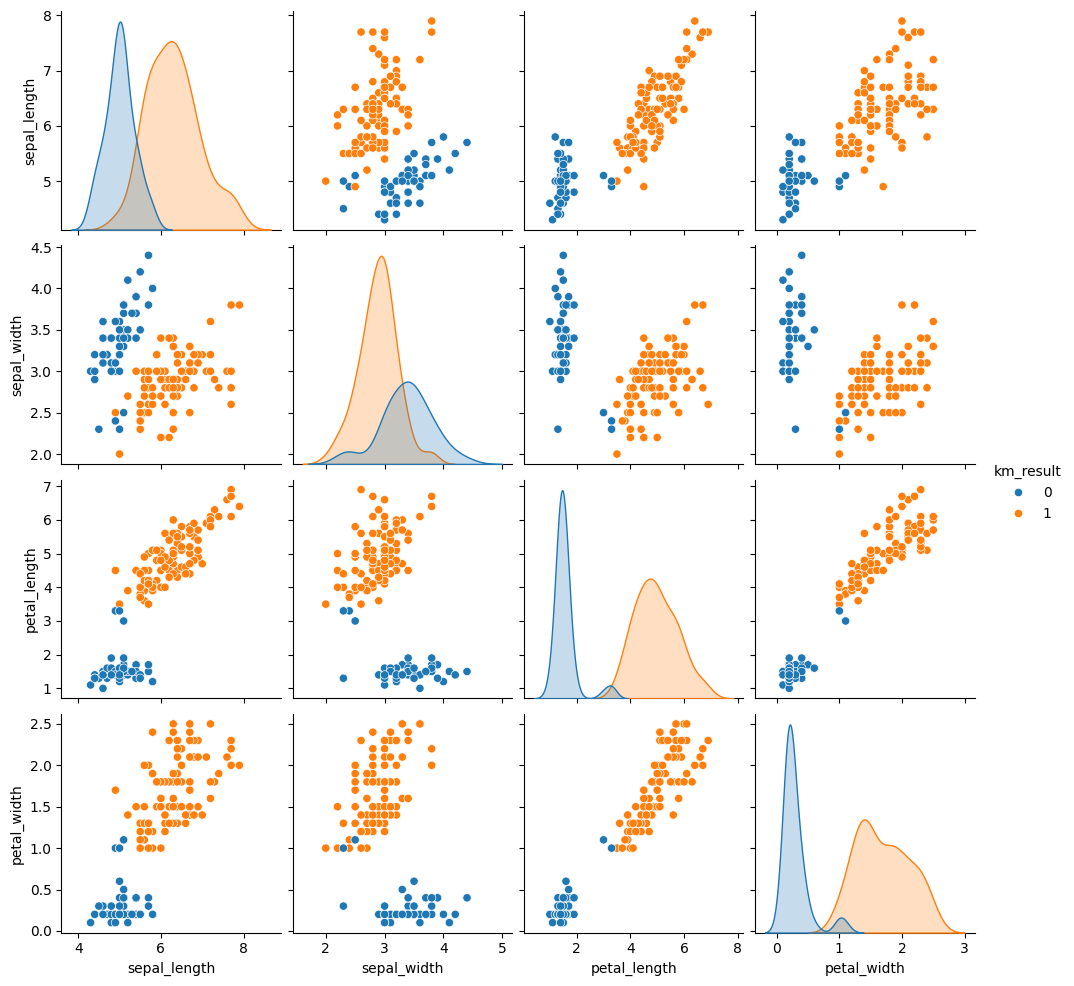

In [18]:
sns.pairplot(iris_km,hue= 'km_result')

In [20]:
# 엘보우 기법 (최적 클러스터 개수 결정)
import matplotlib.pyplot as plt
def elbox(X):
  sse = []
  for i in range(1,5):
    km = KMeans(n_clusters= i, random_state = 1)
    km.fit(X)
    sse.append(km.inertia_)
  plt.plot(range(1,5), sse, marker = 'o')
  plt.xlabel('cluster number')
  plt.ylabel('SSE')
  plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


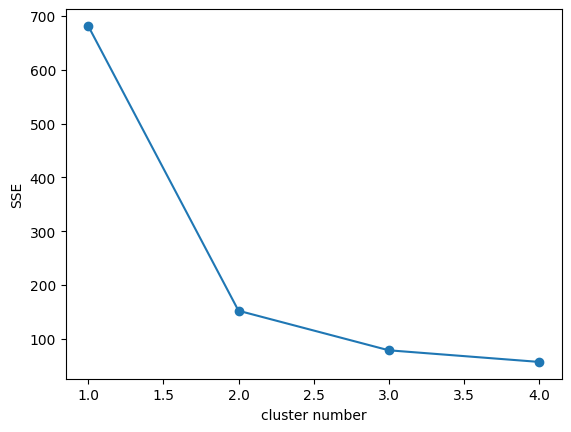

In [21]:
elbox(X)

In [22]:
# 군집의 특성 확인
iris_km.groupby('km_result').mean()

,sepal_length,sepal_width,petal_length,petal_width
km_result,,,,
0,5.005660,3.369811,1.560377,0.290566
1,6.301031,2.886598,4.958763,1.695876


# 3) 밀도기반 클러스터
* DBSCAN

* 데이터 포인트를 밀도에 따라 클러스터로 그룹화하고, 밀도가 낮은 포인트는 노이즈로 취급

* 클러스터 수를 미리 지정할 필요가 없으며
노이즈 데이터 포인트를 잘 감지

* 그러나 고차원 데이터에서는 성능이 저하될 수 있음

In [23]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(X)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

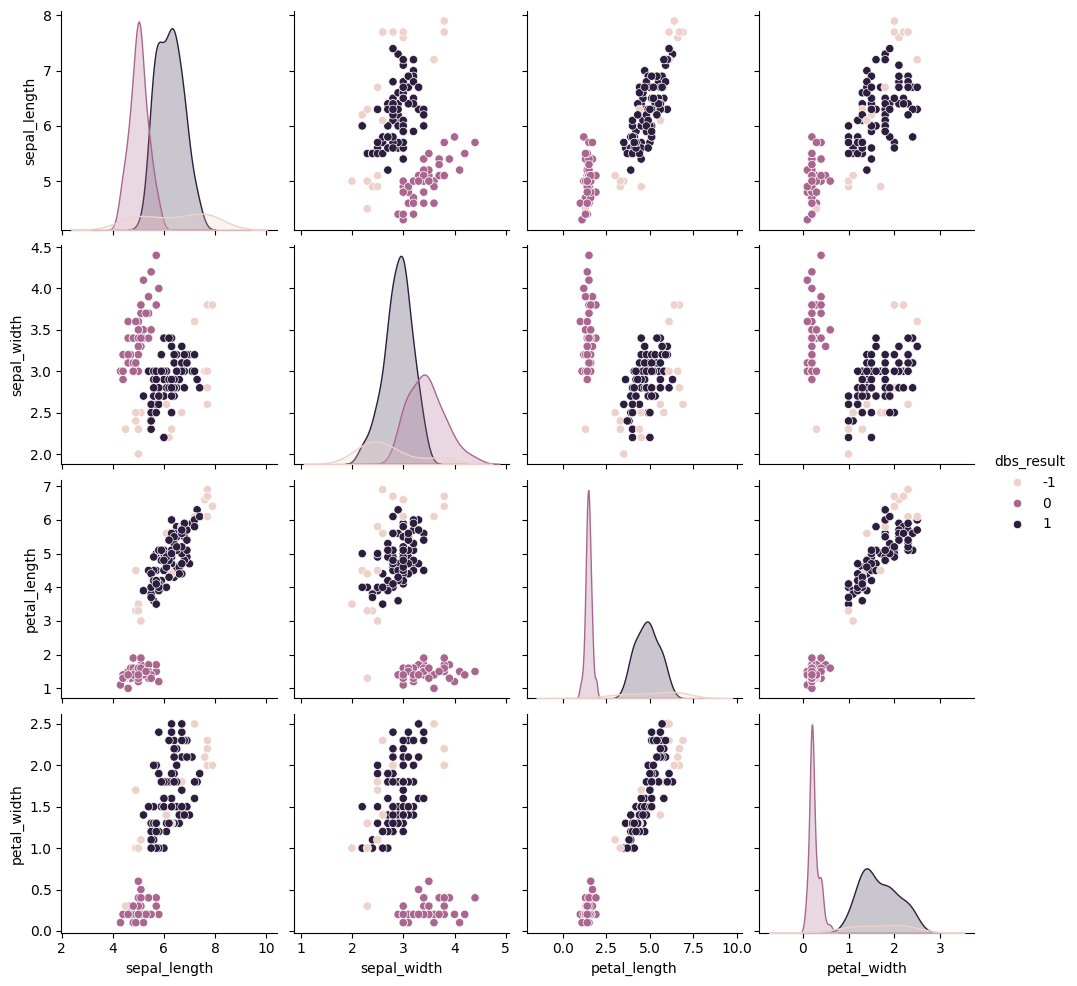

In [24]:
dbs_df = X.copy()
dbs_df['dbs_result'] = dbscan.labels_
sns.pairplot(dbs_df, hue = 'dbs_result')

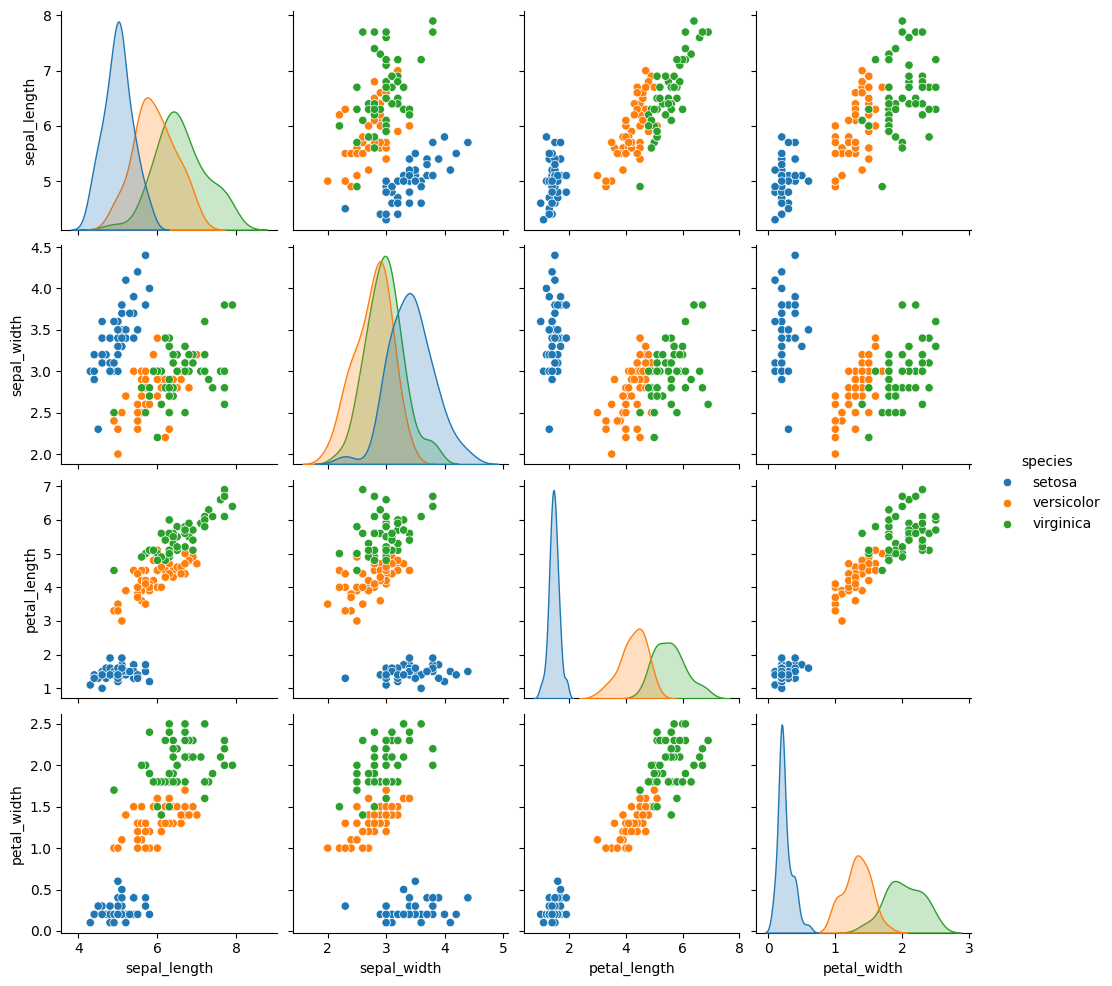

In [26]:
#원본 데이터
sns.pairplot(iris, hue = 'species')

# 4) 혼합 분포 군집
* 모형 기반 군집 :
데이터가 여러 가지 서로 다른 확률 분포에 의해 생성되었다고 가정하여 데이터를 군집화하는 방법

* 혼합 가우시안 분포: 데이터는 여러 개의 가우시안 분포로부터 생성된다고 가정.
* EM 알고리즘: 기대값 최대화(Expectation-Maximization) 알고리즘을 사용하여 각 가우시안 분포의 매개변수를 추정
  * Expectation (E 단계): 현재 추정된 매개변수로 각 데이터 포인트가 각 가우시안 분포에 속할 확률을 계산
  * Maximization (M 단계): E-step에서 계산된 확률을 사용하여 가우시안 분포의 매개변수를 다시 추정


In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df = iris.drop('species',axis = 1)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(df)
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [33]:
from sklearn.mixture import GaussianMixture
gm_model = GaussianMixture(n_components = 3)
gm_model.fit(scaled)
gm_clustered = gm_model.predict(scaled)
gm_clustered

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
df['gm_cluster'] = gm_clustered

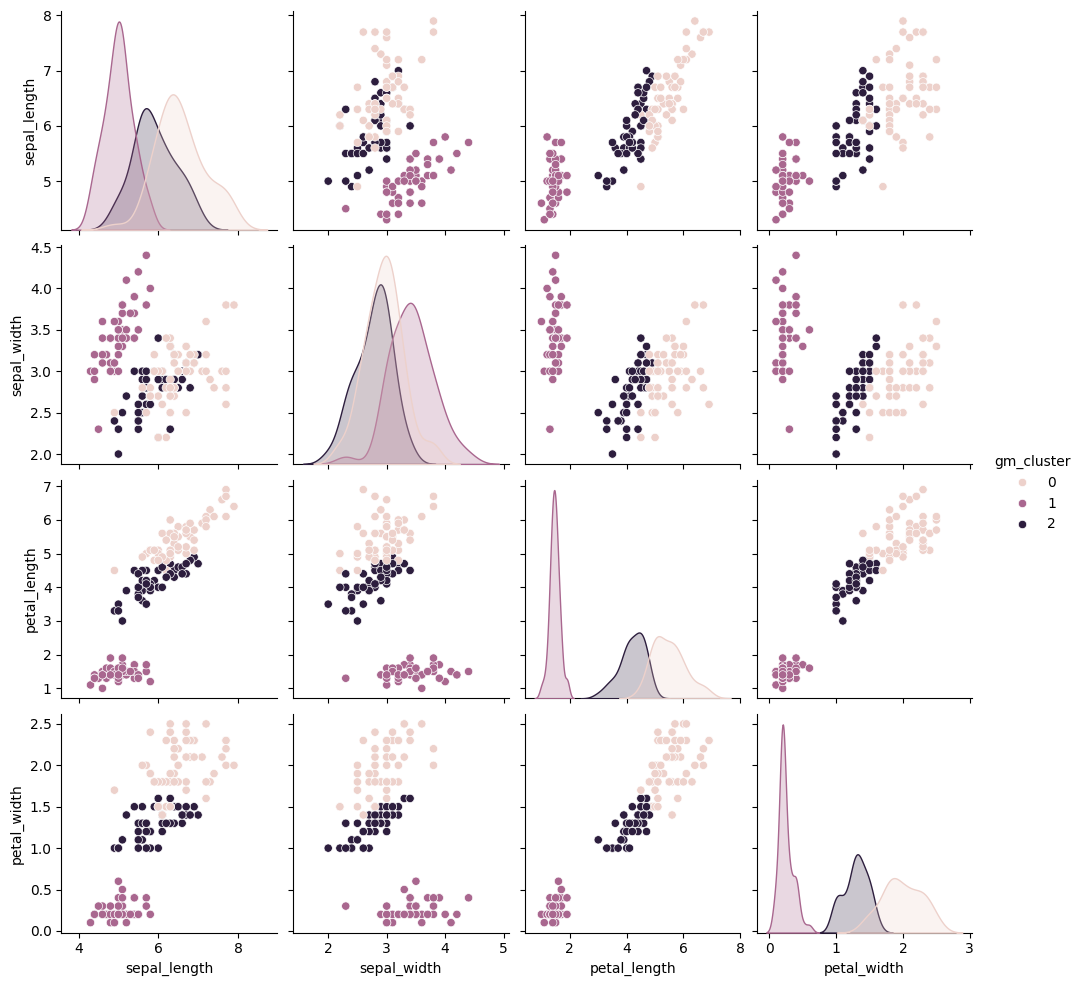

In [35]:
sns.pairplot(df, hue = 'gm_cluster')

In [36]:
df.groupby('gm_cluster').median()

,sepal_length,sepal_width,petal_length,petal_width
gm_cluster,,,,
0,6.4,3.0,5.5,2.0
1,5.0,3.4,1.5,0.2
2,5.8,2.8,4.2,1.3
